In [2]:
from networks import *
from simulation import *
from display import *
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

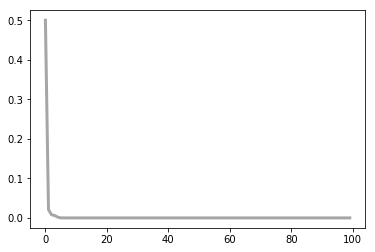

In [3]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .05, time_steps=100)
plot_all_time_steps(data)

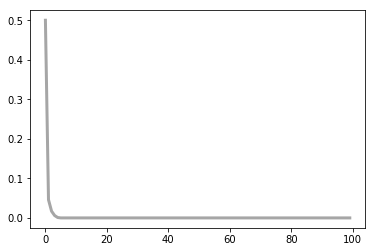

In [4]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .10, time_steps=100)
plot_all_time_steps(data)

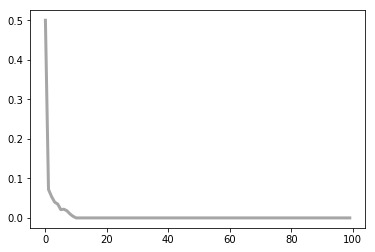

In [5]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .15, time_steps=100)
plot_all_time_steps(data)

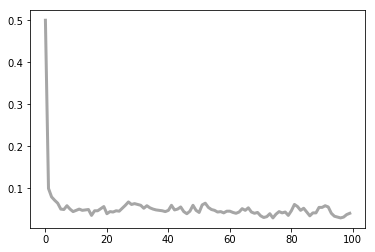

In [6]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .20, time_steps=100)
plot_all_time_steps(data)

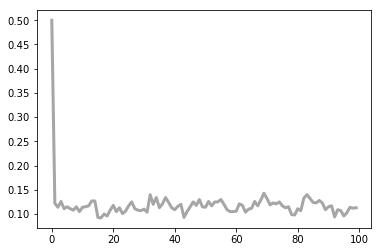

In [7]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .25, time_steps=100)
plot_all_time_steps(data)

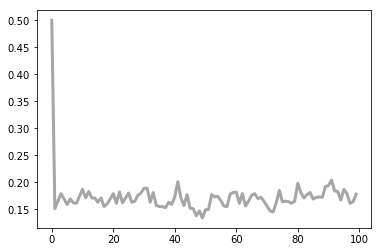

In [8]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .30, time_steps=100)
plot_all_time_steps(data)

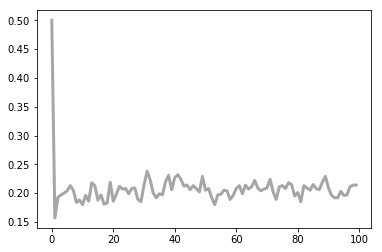

In [9]:
g = gen_WS_graph(1000, 6, 0.5)
data = run_SIS_simulation(g, .35, time_steps=100)
plot_all_time_steps(data)

In [11]:
data = {}
lambdas_plan = {
    1e3 : np.linspace(1/12, 1/8, 5),
    5e3 : np.linspace(1/15, 1/10, 3),
    1e4 : np.linspace(1/17, 1/12, 2),
    5e4 : np.linspace(1/18, 1/15, 2),
    8.5e4 : np.linspace(1/20, 1/19, 2),
    8.5e4 : [1/20]
}

graphs = {}
for size in lambdas_plan.keys():
    print('starting size: ', size)
    g = gen_WS_graph(int(size), 6, 0.5)
    graphs[size] = g


starting size:  1000.0
starting size:  5000.0
starting size:  10000.0
starting size:  50000.0
starting size:  85000.0


In [12]:
import pickle
    
pickle.dump(data, open('big_data_WS.pickle', 'wb'))

In [19]:
import pickle
data = pickle.load(open('big_data_WS.pickle', 'rb'))
print(data)

{}


In [14]:
for size in lambdas_plan.keys():
    for lam in lambdas_plan[size]:
        print('\tstarting lamda: ', lam)
        data[(size, lam)] = []
        for trial in range(10):
            print('t', trial)
            data[(size, lam)].append(run_SIS_simulation(graphs[size], lam, time_steps=20)[-1])
        data[(size, lam)] = np.mean(data[(size, lam)])

	starting lamda:  0.0833333333333
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.09375
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.104166666667
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.114583333333
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.125
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.0666666666667
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.0833333333333
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.1
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.0588235294118
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.0833333333333
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.0555555555556
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.0666666666667
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9
	starting lamda:  0.05
t 0
t 1
t 2
t 3
t 4
t 5
t 6
t 7
t 8
t 9


/home/slyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/home/slyu/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


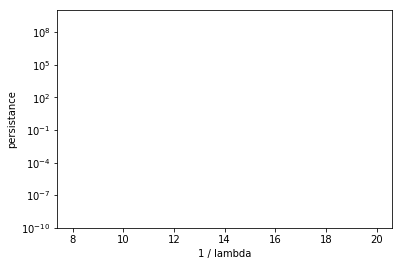

In [18]:
plottable_data = {}
for size, lam in data:
    plottable_data[size] = plottable_data.get(size, []) + [(1.0/lam, data[(size, lam)])]
    
# plot a fit
all_xs = []
all_ys = []
for values in plottable_data.values():
    xs, ys = zip(*values)
    all_xs.extend(xs)
    all_ys.extend(ys)
    
a, c = np.polyfit(all_xs, np.log(all_ys), 1)
fit_xs = np.linspace(8, 20, 100)
fit_ys = np.exp(a * fit_xs + c)
thinkplot.plot(fit_xs, fit_ys, style='--', linewidth=1, color=(.4,.4,.4), alpha=1.0)


# plot a 
shapes = ['o', '+', 's', 'x', 'v', '.']
colors = [(1., 0., 0.), (1., .5, 0.), (.5, 1., 0.), (0., 1., 0.), (0., .9, .9)]

for size, shape, color in zip(plottable_data, shapes, colors):
    xs, ys = zip(*plottable_data[size])
    thinkplot.plot(xs, ys, style='^', color=color, markersize=10, alpha=1.0)
    

thinkplot.config(ylim=[1e-10, 1e10], yscale='log', xlabel='1 / lambda', ylabel='persistance')
